In [1]:
import numpy as np
import pandas as pd
from scipy.stats import uniform

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


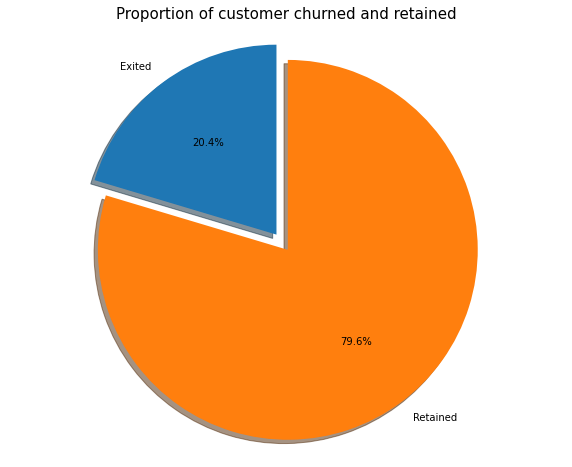

In [8]:
labels = ['Exited', 'Retained']
sizes = [df.Exited[df.Exited == 1].count(), df.Exited[df.Exited == 0].count()]
explode = (0, 0.1)
plt.figure(figsize =(10,8))
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Proportion of customer churned and retained', size = 15)
plt.show()

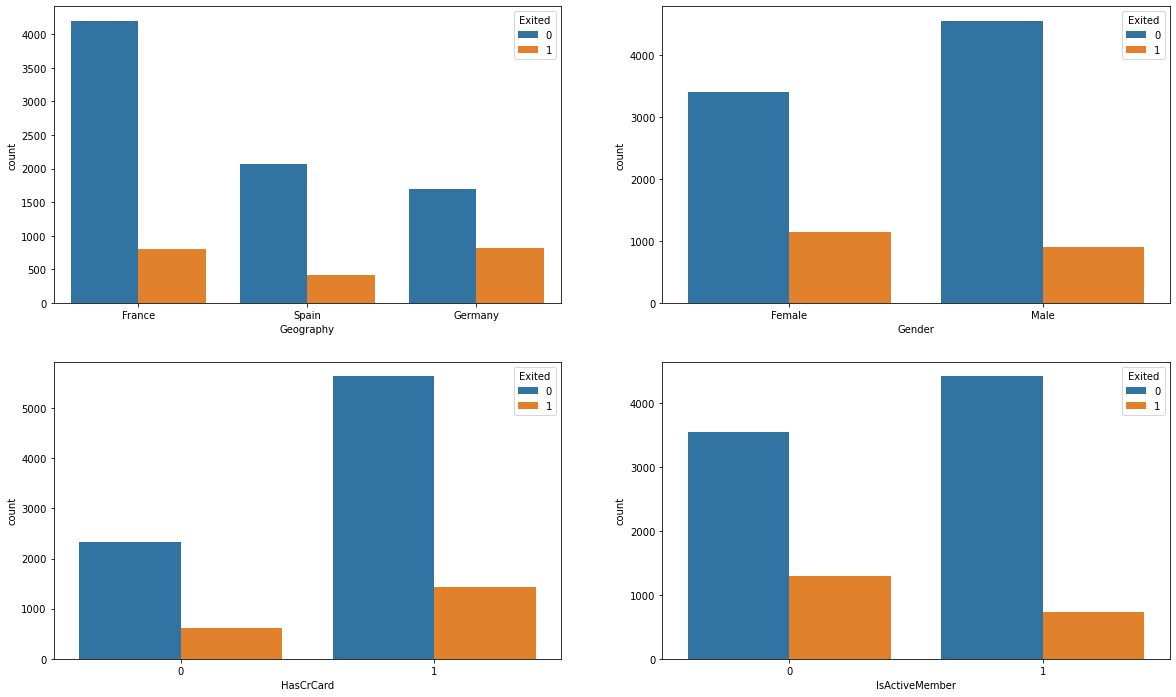

In [9]:
fig, axs = plt.subplots(2,2, figsize =(20,12))
sns.countplot(x= 'Geography', hue = 'Exited', data = df, ax = axs[0][0])
sns.countplot(x= 'Gender', hue = 'Exited', data = df, ax = axs[0][1])
sns.countplot(x= 'HasCrCard', hue = 'Exited', data = df, ax = axs[1][0])
sns.countplot(x= 'IsActiveMember', hue = 'Exited', data = df, ax = axs[1][1]);

1. Majority of the data is from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

2. The proportion of female customers churning is also greater than that of male customers

3. Also, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

4. Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

In [10]:
train ,test = train_test_split(df, test_size = 0.2, random_state =200)

In [11]:
train['BalanceSalaryRatio'] = train['Balance']/train['EstimatedSalary']

In [12]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
5541,587,Spain,Male,51,3,83739.32,1,0,1,148798.45,0,0.562770
5408,682,Spain,Female,54,0,83102.72,2,1,1,54132.93,0,1.535160
2364,707,France,Female,31,2,82787.93,2,0,0,91423.69,0,0.905541
1257,628,France,Female,38,3,0.00,2,1,1,48924.73,0,0.000000
6342,581,France,Female,37,10,104255.03,1,1,0,86609.37,0,1.203738
...,...,...,...,...,...,...,...,...,...,...,...,...
7769,766,France,Female,27,7,158786.67,2,0,1,47579.25,0,3.337309
8377,802,Spain,Male,40,4,0.00,2,1,1,81908.09,0,0.000000
9036,768,France,Female,36,3,141334.95,1,0,1,125870.50,0,1.122860
784,747,Germany,Male,58,7,116313.57,1,1,1,190696.35,1,0.609941


In [13]:
train['TenureByAge'] = train['Tenure']/train['Age']

In [14]:
train['CreditScoreGivenAge'] = train['CreditScore']/train['Age']

In [15]:
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 
                   'TenureByAge', 'CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
train = train[['Exited'] + continuous_vars + cat_vars]
train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
5541,0,587,51,3,83739.32,1,148798.45,0.562770,0.058824,11.509804,0,1,Spain,Male
5408,0,682,54,0,83102.72,2,54132.93,1.535160,0.000000,12.629630,1,1,Spain,Female
2364,0,707,31,2,82787.93,2,91423.69,0.905541,0.064516,22.806452,0,0,France,Female
1257,0,628,38,3,0.00,2,48924.73,0.000000,0.078947,16.526316,1,1,France,Female
6342,0,581,37,10,104255.03,1,86609.37,1.203738,0.270270,15.702703,1,0,France,Female


In [16]:
'''For the binary variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''

train.loc[train.HasCrCard == 0, 'HasCrCard'] = -1
train.loc[train.IsActiveMember == 0, 'IsActiveMember'] = -1

In [17]:
l = ['Geography', 'Gender']
remove = []

for category in l:
    if(train[category].dtype == str or train[category].dtype == object):
        for value in train[category].unique():
            train[category + '_' + value] = np.where(train[category] == value, 1, -1)
        remove.append(category)
train = train.drop(remove, axis = 1)
train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Male,Gender_Female
5541,0,587,51,3,83739.32,1,148798.45,0.562770,0.058824,11.509804,-1,1,1,-1,-1,1,-1
5408,0,682,54,0,83102.72,2,54132.93,1.535160,0.000000,12.629630,1,1,1,-1,-1,-1,1
2364,0,707,31,2,82787.93,2,91423.69,0.905541,0.064516,22.806452,-1,-1,-1,1,-1,-1,1
1257,0,628,38,3,0.00,2,48924.73,0.000000,0.078947,16.526316,1,1,-1,1,-1,-1,1
6342,0,581,37,10,104255.03,1,86609.37,1.203738,0.270270,15.702703,1,-1,-1,1,-1,-1,1


In [18]:
#minmax scaling of continuous variables
scaler = MinMaxScaler()
train[continuous_vars] = scaler.fit_transform(train[continuous_vars])

In [19]:
train

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Male,Gender_Female
5541,0,0.474,0.445946,0.3,0.333758,0.000000,0.744005,0.000053,0.105882,0.158277,-1,1,1,-1,-1,1,-1
5408,0,0.664,0.486486,0.0,0.331221,0.333333,0.270633,0.000145,0.000000,0.184919,1,1,1,-1,-1,-1,1
2364,0,0.714,0.175676,0.2,0.329966,0.333333,0.457104,0.000085,0.116129,0.427042,-1,-1,-1,1,-1,-1,1
1257,0,0.556,0.270270,0.3,0.000000,0.333333,0.244589,0.000000,0.142105,0.277628,1,1,-1,1,-1,-1,1
6342,0,0.462,0.256757,1.0,0.415527,0.000000,0.433030,0.000113,0.486486,0.258033,1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,0,0.832,0.121622,0.7,0.632873,0.333333,0.237861,0.000314,0.466667,0.559416,-1,1,-1,1,-1,-1,1
8377,0,0.904,0.297297,0.4,0.000000,0.333333,0.409522,0.000000,0.180000,0.361461,1,1,1,-1,-1,1,-1
9036,0,0.836,0.243243,0.3,0.563316,0.000000,0.629355,0.000106,0.150000,0.391994,-1,1,-1,1,-1,-1,1
784,1,0.794,0.540541,0.7,0.463589,0.000000,0.953515,0.000057,0.217241,0.190860,1,1,-1,-1,1,1,-1


In [20]:
def DfPrepPipeline(df_predict,df_train_Cols):
    
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age)
    
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    
    l = ["Geography", "Gender"]
    remove = []
    for category in l:
        for value in df_predict[category].unique():
            df_predict[category +'_'+ value] = np.where(df_predict[category] == value ,1,-1)
        remove.append(category)
    df_predict = df_predict.drop(remove, axis=1)
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    df_predict[continuous_vars] = scaler.fit_transform(df_predict[continuous_vars])
    return df_predict

In [21]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
    return (auc_score, fpr_df, tpr_df)

In [22]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 
              'max_iter': [250], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'], 
              'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(train.loc[:, train.columns != 'Exited'],train.Exited)
best_model(log_primal_Grid)

0.820875
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, tol=1e-05)


In [23]:
param_grid = {'C': [0.1,10,50], 
              'max_iter': [300,500], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(train.loc[:, train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,train.Exited)
best_model(log_pol2_Grid)

0.8630000000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [24]:
param_grid = {'C': [0.5,100,150], 
              'gamma': [0.1,0.01,0.001],
              'probability':[True],
              'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(train.loc[:, train.columns != 'Exited'],train.Exited)
best_model(SVM_grid)

0.852999620358783
{'C': 150, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=150, gamma=0.1, probability=True)


In [25]:
param_grid = {'C': [0.5,1,10,50,100], 
              'gamma': [0.1,0.01,0.001],
              'probability':[True],
              'kernel': ['poly'],
              'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(train.loc[:, train.columns != 'Exited'],train.Exited)
best_model(SVM_grid)

0.8583750737084346
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [26]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 
              'max_features': [2,4,6,7,8,9],
              'n_estimators':[50,100],
              'min_samples_split': [3, 5, 6, 7]}
Forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
Forest_grid.fit(train.loc[:, train.columns != 'Exited'],train.Exited)
best_model(Forest_grid)

0.866375
{'max_depth': 8, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=6)


In [31]:
param_grid = {'max_depth': [5,6,7,8], 
              'gamma': [0.01,0.001,0.001],
              'min_child_weight':[1,5,10], 
              'learning_rate': [0.05,0.1, 0.2, 0.3], 
              'n_estimators':[5,10,20,100],
              'use_label_encoder': [False],
              'eval_metric': ['logloss']
             }
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(train.loc[:, train.columns != 'Exited'],train.Exited)
best_model(xgb_grid)

0.867375
{'eval_metric': 'logloss', 'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 10, 'use_label_encoder': False}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


Fitting the best models

In [34]:
lr_primal = LogisticRegression( C= 50, 
                                fit_intercept = True, 
                                intercept_scaling = 1, 
                                max_iter= 250, 
                                penalty= 'l2', 
                                tol= 1e-05,
                                solver = 'lbfgs'
                               )
lr_primal.fit(train.loc[:, train.columns != 'Exited'], train['Exited'])

LogisticRegression(C=50, max_iter=250, tol=1e-05)

In [35]:
poly_2 = PolynomialFeatures(degree = 2)
df_train_pol2 = poly2.fit_transform(train.loc[:, train.columns != 'Exited'])
lr_poly = LogisticRegression(C = 50, 
                             fit_intercept = True, 
                             intercept_scaling = 1, 
                             max_iter = 300, 
                             penalty = 'l2', 
                             tol = 0.0001,
                             solver= 'liblinear')
lr_poly.fit(df_train_pol2, train['Exited'])

LogisticRegression(C=50, max_iter=300, solver='liblinear')

In [36]:
svm_rbf = SVC(C = 150, 
              gamma = 0.1, 
              kernel = 'rbf', 
              probability = True)
svm_rbf.fit(train.loc[:, train.columns != 'Exited'], train['Exited'])

SVC(C=150, gamma=0.1, probability=True)

In [37]:
svm_pol = SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)
svm_pol.fit(train.loc[:, train.columns != 'Exited'], train['Exited'])

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [38]:
forest_model = RandomForestClassifier(max_depth=8, 
                                      max_features=8, 
                                      min_samples_split=6, 
                                      n_estimators=100)
forest_model.fit(train.loc[:, train.columns != 'Exited'], train['Exited'])

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=6)

In [41]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
XGB.fit(train.loc[:, train.columns != 'Exited'], train['Exited'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [42]:
print(classification_report(train['Exited'], lr_primal.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6390
           1       0.66      0.24      0.35      1610

    accuracy                           0.82      8000
   macro avg       0.75      0.60      0.62      8000
weighted avg       0.80      0.82      0.79      8000



In [44]:
print(classification_report(train['Exited'], lr_poly.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6390
           1       0.77      0.48      0.59      1610

    accuracy                           0.87      8000
   macro avg       0.83      0.72      0.76      8000
weighted avg       0.86      0.87      0.85      8000



In [45]:
print(classification_report(train['Exited'], svm_rbf.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6390
           1       0.83      0.41      0.55      1610

    accuracy                           0.87      8000
   macro avg       0.85      0.70      0.74      8000
weighted avg       0.86      0.87      0.85      8000



In [46]:
print(classification_report(train['Exited'], svm_pol.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6390
           1       0.84      0.38      0.52      1610

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [47]:
print(classification_report(train['Exited'], forest_model.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6390
           1       0.87      0.53      0.66      1610

    accuracy                           0.89      8000
   macro avg       0.88      0.75      0.80      8000
weighted avg       0.89      0.89      0.88      8000



In [49]:
print(classification_report(train['Exited'], XGB.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6390
           1       0.83      0.52      0.64      1610

    accuracy                           0.88      8000
   macro avg       0.86      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



In [51]:
y = train['Exited']
X = train.loc[:, train.columns != 'Exited']
X_pol2 = df_train_pol2

auc_lr_primal, fpr_lr_primal, tpr_lr_primal = get_auc_scores(y, lr_primal.predict(X),lr_primal.predict_proba(X)[:,1])
auc_lr_pol2, fpr_lr_pol2, tpr_lr_pol2 = get_auc_scores(y, lr_poly.predict(X_pol2),lr_poly.predict_proba(X_pol2)[:,1])

auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, svm_rbf.predict(X), svm_rbf.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, svm_pol.predict(X), svm_pol.predict_proba(X)[:,1])

auc_forest, fpr_forest, tpr_forest = get_auc_scores(y, forest_model.predict(X), forest_model.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

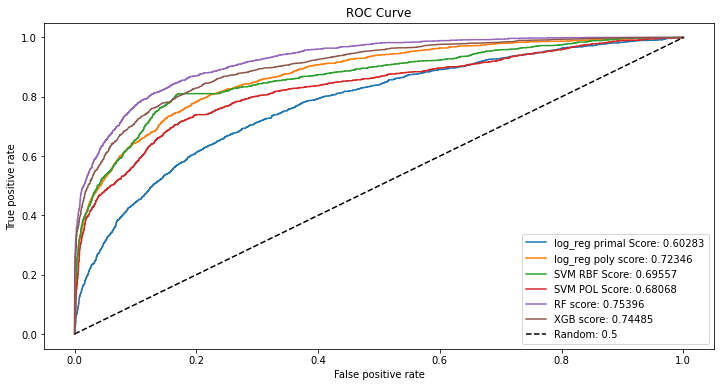

In [55]:
plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_lr_primal, tpr_lr_primal, label= 'log_reg primal Score: ' + str(round(auc_lr_primal, 5)))
plt.plot(fpr_lr_pol2, tpr_lr_pol2, label = 'log_reg poly score: ' + str(round(auc_lr_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_forest, tpr_forest, label = 'RF score: ' + str(round(auc_forest, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))

plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_results_ratios.png')
plt.show()

From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.
Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.
From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

In [56]:
df_test = DfPrepPipeline(test,train.columns)

In [57]:
df_test

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.118644,0.6,0.000000,0.333333,0.076050,0.000000,0.506667,0.312597,1,1,1,-1,-1,1,-1
6332,0,0.538,0.288136,0.4,0.379269,0.000000,0.102312,0.012452,0.241270,0.292880,1,1,-1,1,-1,1,-1
8895,0,0.698,0.372881,0.8,0.511933,0.000000,0.510240,0.003384,0.422222,0.287372,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.389831,0.2,0.521114,0.000000,0.555768,0.003163,0.102981,0.186334,1,1,-1,-1,1,-1,1
4314,0,0.576,0.271186,0.5,0.560018,0.000000,0.778211,0.002428,0.310458,0.321085,-1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0,1.000,0.542373,1.0,0.000000,0.333333,0.168290,0.000000,0.422222,0.274955,1,1,1,-1,-1,1,-1
3585,0,0.814,0.169492,0.7,0.507207,0.333333,0.656160,0.002608,0.527778,0.537290,1,1,-1,1,-1,-1,1
9024,1,0.580,0.491525,0.6,0.376695,0.333333,0.068432,0.018444,0.269504,0.186524,-1,1,-1,1,-1,1,-1
1194,0,0.828,0.101695,0.7,0.000000,0.333333,0.930629,0.000000,0.615741,0.662701,1,-1,-1,1,-1,1,-1


In [58]:
print(classification_report(df_test['Exited'],  forest_model.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1573
           1       0.61      0.55      0.58       427

    accuracy                           0.83      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.82      0.83      0.83      2000



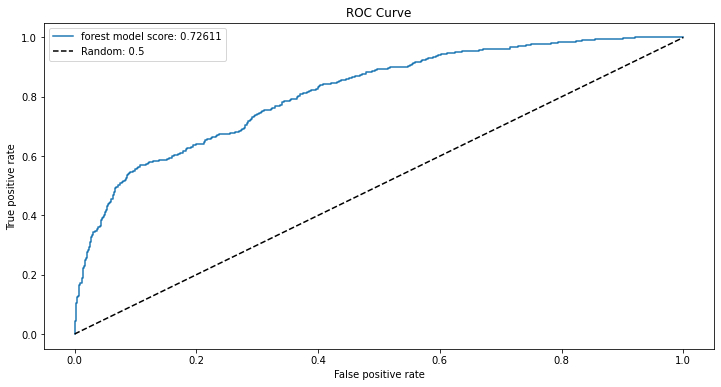

In [60]:
auc_forest_test, fpr_forest_test, tpr_forest_test = get_auc_scores(df_test.Exited, 
                                                                   forest_model.predict(df_test.loc[:, df_test.columns != 'Exited']), 
                                                                   forest_model.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_forest_test, tpr_forest_test, label = 'forest model score: ' + str(round(auc_forest_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_results_ratios.png')
plt.show()

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned